In [271]:
import pandas as pd

In [272]:
df = pd.read_csv(r'spam.csv', encoding='latin-1')

In [273]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [274]:
df.value_counts()

v1   v2                                                                                                                                               Unnamed: 2                                                                    Unnamed: 3                                Unnamed: 4                                              
ham  Edison has rightly said, \A fool can ask more questions than a wise man can answer\" Now you know why all of us are speechless during ViVa.. GM  GN                                                                            GE                                        GNT:-)"                                                     2
     I just lov this line: \Hurt me with the truth                                                                                                     I don't mind                                                                 i wil tolerat.bcs ur my someone..... But   Never comfort me with a lie\" gud ni8 and sweet dreams"    1
     When

In [275]:
df.shape

(5572, 5)

1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model building
5. Evaluation
6. Improvement
7. Website
8. Deployment

##Data Cleaning

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [277]:
#As we can notice last three columns are almost having all null values so we can drop them
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [278]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [279]:
#Renaming the column
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [280]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [281]:
df['Target'] =encoder.fit_transform(df['Target'])
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [282]:
#Checking null values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [283]:
#Check for duplicate values
df.duplicated().sum()

403

In [284]:
#Dropping duplicate values
df.drop_duplicates(inplace=True)

In [285]:
df.shape

(5169, 2)

#EDA

In [286]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7f40bfdea470>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'Ham'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

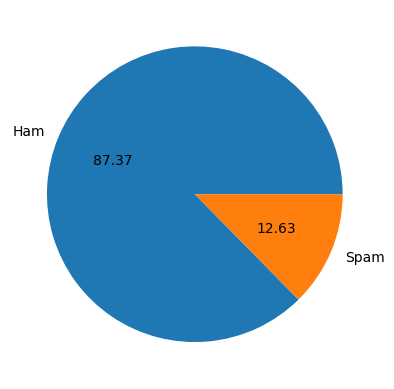

In [287]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f')

Data is imbalanced

In [288]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/rhythm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [289]:
df['num_characters'] = df['Text'].apply(len)
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [290]:
df['num_words']=df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [291]:
df['num_sentences']=df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [292]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [293]:
#ham messages
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [294]:
#Spam messages
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [295]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

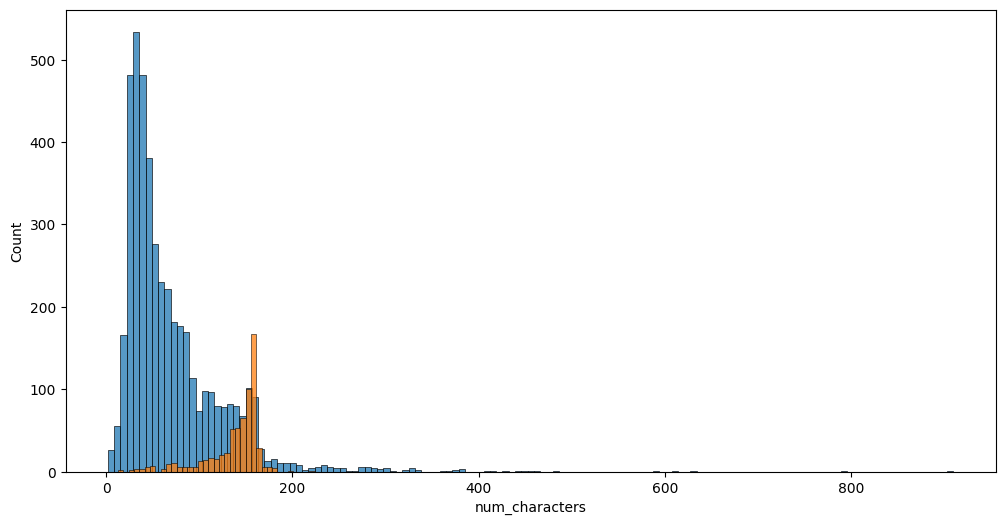

In [296]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

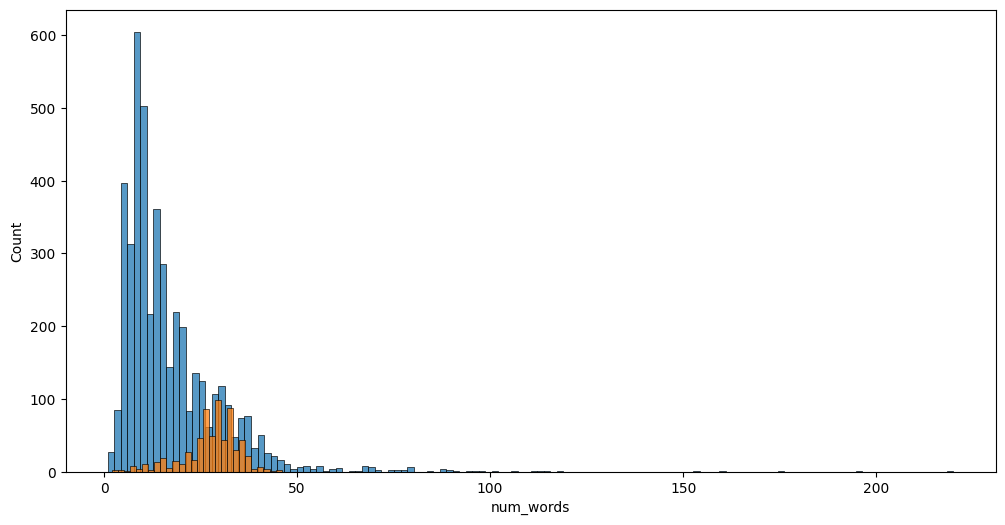

In [297]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'])

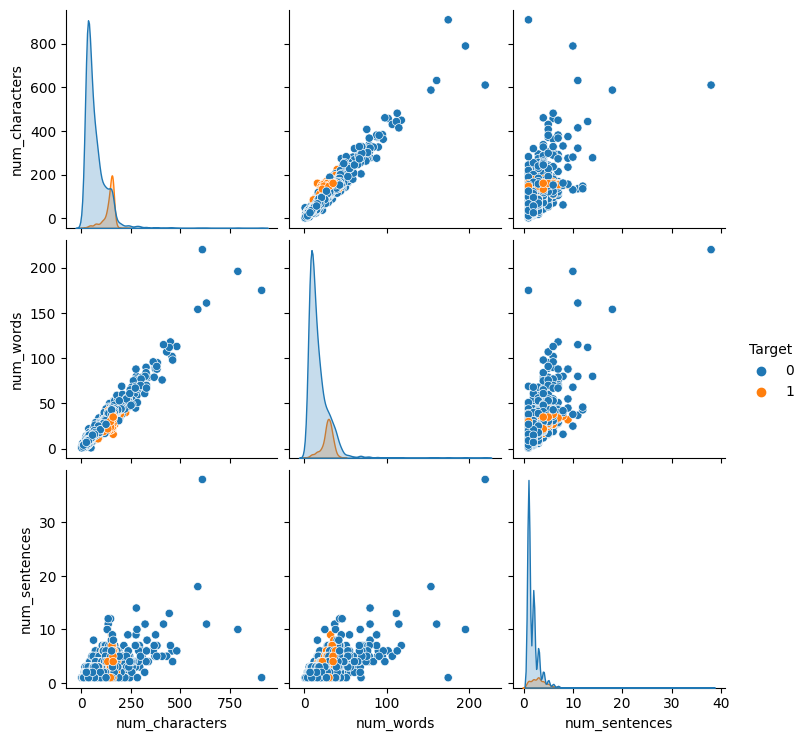

In [298]:
sns.pairplot(df,hue='Target')

In [299]:
# sns.heatmap(df.corr(),annot=True)

Data Preprocessing
1. Lower Case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [300]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps =  PorterStemmer()
ps.stem('beauty')

'beauti'

In [301]:
def transform_text(text):
    text = text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
       if i.isalnum():
            y.append(i) 
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return ' '.join(y)

In [302]:
df['transformed_text']=df['Text'].apply(transform_text)

In [303]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [304]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [305]:
# spam_wc=wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=' '))
# plt.figure(figsize=(20,10))
# plt.imshow(spam_wc)

In [306]:
# ham_wc=wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=' '))
# plt.figure(figsize=(20,10))
# plt.imshow(ham_wc)

In [307]:
spam_corpus= []
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [308]:
len(spam_corpus)

9939

Model Building

In [309]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer()


In [310]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [311]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [312]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [313]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [314]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [315]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [316]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [317]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [318]:
svc = SVC(kernel='sigmoid',gamma=1)
knc= KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [319]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbc,
    'xgb':xgb
}

In [320]:
def train_classifier(clfs,X_train,X_test,y_train,y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test)
    precision = precision_score(y_pred,y_test)

    return accuracy, precision

In [321]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf,X_train,X_test,y_train,y_test)
    print('For',name)
    print('Accuracy', current_accuracy)
    print('Precision ', current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy 0.9729206963249516
Precision  0.8188405797101449
For KN
Accuracy 0.9003868471953579
Precision  0.2536231884057971
For NB
Accuracy 0.9593810444874274
Precision  0.6956521739130435
For DT
Accuracy 0.937137330754352
Precision  0.6376811594202898
For LR
Accuracy 0.9516441005802708
Precision  0.6811594202898551
For RF
Accuracy 0.971953578336557
Precision  0.7898550724637681
For AdaBoost
Accuracy 0.9613152804642167
Precision  0.7536231884057971
For BgC
Accuracy 0.9584139264990329
Precision  0.8188405797101449
For ETC
Accuracy 0.9729206963249516
Precision  0.8115942028985508
For GBDT
Accuracy 0.9526112185686654
Precision  0.7028985507246377
For xgb
Accuracy 0.9700193423597679
Precision  0.8333333333333334


In [322]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [323]:
performance_df

,Algorithm,Accuracy,Precision
10,xgb,0.970019,0.833333
7,BgC,0.958414,0.818841
0,SVC,0.972921,0.818841
8,ETC,0.972921,0.811594
5,RF,0.971954,0.789855
6,AdaBoost,0.961315,0.753623
9,GBDT,0.952611,0.702899
2,NB,0.959381,0.695652
4,LR,0.951644,0.681159
3,DT,0.937137,0.637681


In [324]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))